In [1]:
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

import numpy as np
import matplotlib.pyplot as plt

from src.skygraph import SkyGraph
from src.skygraph import SkyAgent
from src.skygraph import SkyModel
from src.skygraph.model import LOGGER

%load_ext autoreload
%autoreload 2

## Graph test

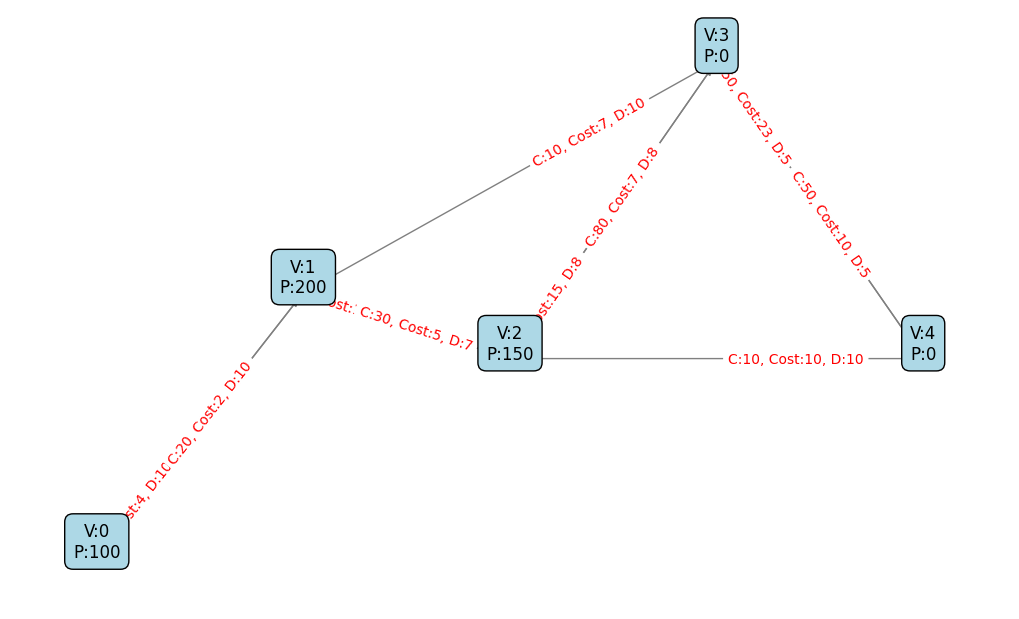

In [2]:
# Пример использования
graph = SkyGraph(5)
graph._default()
graph.visualize(use_real_distances=True)

## Default agent test

In [3]:
agent = SkyAgent(5)
prob_transition_matrix = agent.get_politic(graph)
print(prob_transition_matrix)


[[0.5        0.5        0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.25       0.25       0.25       0.25      ]
 [0.         0.         0.33333333 0.33333333 0.33333333]]


## Model test

In [6]:

muls = np.linspace(1, 5,100)
avg_congesteds = []

for mul in muls:
    graph = SkyGraph(5)
    graph._default(mul = mul)
    agent = SkyAgent(5)
    model = SkyModel(graph, agent)

    avg_congested = model.run_simulation(10)
    avg_congesteds.append(avg_congested)

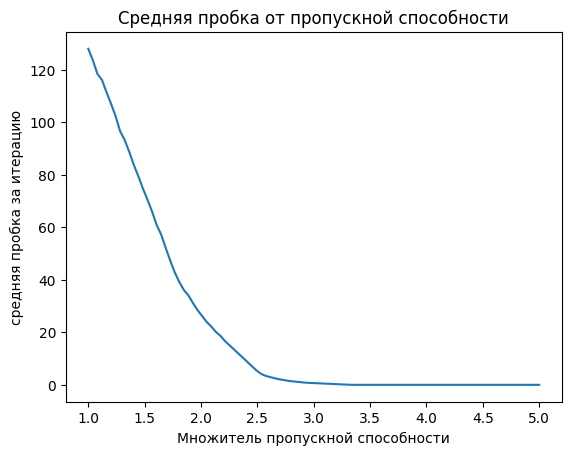

In [7]:
plt.plot(muls, avg_congesteds)
plt.title('Средняя пробка от пропускной способности')
plt.ylabel('средняя пробка за итерацию')
plt.xlabel('Множитель пропускной способности')
plt.show()